# Assignment5-Bootstrap

# 1 Assignment 5 - The Bootstrap
# 1.1 Overview of the steps
1. Loading the data and getting an overview of the data
2. Estimating the standard error of parameters of a Linear Regression Model
3. Estimating the standard error of parameters of a Quadratic Regression Model
# 1.2 Steps in detail
## 1.2.1 Loading the data and getting an overview of the data

Load the data file `Auto.csv`.

In [1]:
import numpy.random
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from statsmodels.formula.api import ols
import scipy
import seaborn as sns
default_figsize=(8, 6)

/home/bogdan/lnu/4dv660/ml-practice/venv/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
auto_df = pd.read_csv('../ISLR/data/Auto.csv', index_col=[0])

Display the number of predictors (including the response `mpg`) and their names:

In [3]:
print(len(auto_df.columns))
print(auto_df.columns)

9
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


Print a statistic summary of the predictors and the response `mpg`:

In [4]:
auto_df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN


Display the number of data points:

In [5]:
len(auto_df)

392

Display the data in a table:

> Top 20 rows are shown.

In [6]:
n = 20
display(auto_df.info(verbose=True))
display(auto_df.head(n))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


None

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
6,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
7,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
8,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
9,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
10,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


Compute the pairwise correlation of the predictors in the data set

In [7]:
def corrmat(df, ylab=None, render=display):
    """Does not do symbol-coded chart."""
    def pearsonr_pval(x,y):
        return scipy.stats.pearsonr(x,y)[1]
    if ylab is not None:
        df = df.drop(ylab, axis=1)
    render(Markdown('Pearson:'))
    corr = df.corr(method='pearson')
    render(corr)
    render(Markdown('P values:'))
    render(df.corr(method=pearsonr_pval))
    render(Markdown('Pearson (chart):'))
    fig, ax = plt.subplots(figsize=default_figsize)
    sns.heatmap(corr.round(2), ax=ax, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
    plt.show()

> In R, given `Auto` is a 2-dimensional list, `Auto[,-9]` returns the same 2-dimensional list without 9th column. In Python and my function it is done in a similar way, but the index is zero-based, meaning the index is 8.

Pearson:

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


P values:

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000e+00,1.311384e-80,1.660642e-90,7.031989e-81,6.015296e-102,1.778576e-18,1.075794e-36,1.811080e-34
cylinders,1.311384e-80,1.000000e+00,1.298636e-200,4.633884e-107,9.290616e-141,1.009001e-26,1.925683e-12,5.346559e-35
displacement,1.660642e-90,1.298636e-200,1.000000e+00,1.510889e-140,3.489084e-175,1.508540e-31,3.747957e-14,4.488253e-42
horsepower,7.031989e-81,4.633884e-107,1.510889e-140,1.000000e+00,1.364347e-118,1.581886e-56,7.220175e-18,1.917552e-21
weight,6.015296e-102,9.290616e-141,3.489084e-175,1.364347e-118,1.000000e+00,6.565616e-18,3.986518e-10,2.296914e-37
acceleration,1.778576e-18,1.009001e-26,1.508540e-31,1.581886e-56,6.565616e-18,1.000000e+00,4.735475e-09,2.162446e-05
year,1.075794e-36,1.925683e-12,3.747957e-14,7.220175e-18,3.986518e-10,4.735475e-09,1.000000e+00,3.030874e-04
origin,1.811080e-34,5.346559e-35,4.488253e-42,1.917552e-21,2.296914e-37,2.162446e-05,3.030874e-04,1.000000e+00


Pearson (chart):

<IPython.core.display.Javascript object>


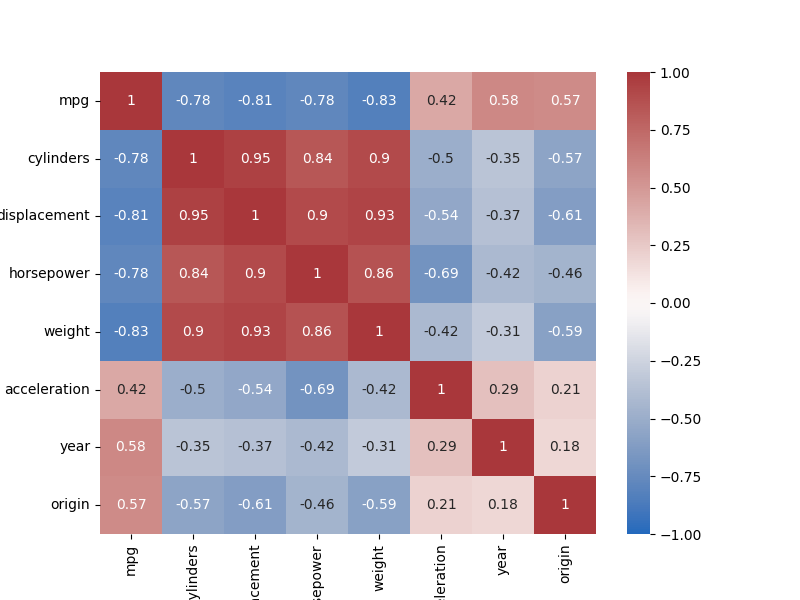

In [8]:
corrmat(auto_df, auto_df.columns[8])

## 1.2.2 Estimating the Accuracy of a Linear Regression Model

We first create a simple function, `lr_params()`, which takes in the `Auto` data set as well as a set of indices for the observations, and returns the intercept and slope estimates for the linear regression model. We then apply this function to the full set of 392 observations in order to compute the estimates of $\beta_0$ and $\beta_1$ on the entire data set using the usual linear regression coefficient estimate formulas.
> The indices argument is optional. Without it the entire dataset will be used.

In [9]:
def lr_params(df, indices=None):
    return ols('mpg~horsepower', df.iloc[indices] if indices is not None else df).fit().params
lr_params(auto_df, range(0, 392))

Intercept     39.935861
horsepower    -0.157845
dtype: float64

The `lr_params()` function can also be used in order to create bootstrap estimates for the intercept and slope terms by randomly sampling from among the observations with replacement. Here two examples where the `sample()` function creates different training data sets based on the original `Auto` data

In [10]:
random_state = None


def reset_random(seed=1):
    global random_state
    random_state = np.random.RandomState(1)

def sample(df, n=None):    return df.sample(n if n is not None else len(df), replace=True, random_state=random_state)

In [11]:
reset_random()
lr_params(sample(auto_df, 392))

Intercept     39.658479
horsepower    -0.155898
dtype: float64

In [12]:
lr_params(sample(auto_df, 392))

Intercept     40.733271
horsepower    -0.163901
dtype: float64

Next, we use the `boot()` function to compute the standard errors of 1, 000 bootstrap estimates for the intercept and slope terms.

In [13]:
def boot(df, get_params, times):
    params_arr = []
    names_index = None
    for i in range(times):
        sample_df = sample(df)
        params = get_params(sample_df)
        if hasattr(params, 'index'):
            if names_index is None or len(names_index) < len(params.index):
                names_index = params.index
        for i, param in enumerate(params):
            if i < len(params_arr):
                arr = params_arr[i]
            else:
                arr = []
                params_arr.append(arr)
            arr.append(param)
    params0 = tuple(get_params(df))
    if names_index is None:
        names_index = pd.Index('t' + i for i in range(len(params_arr)))
    result = pd.DataFrame({'Original': params0, 'StdE': tuple(np.std(arr, ddof=1) for arr in params_arr), 'Bias': tuple(np.mean(arr) - params0[i] for i, arr in enumerate(params_arr))}, index=names_index)
    return result

In [14]:
reset_random(1448)
boot_result = boot(auto_df, lr_params, 1000)
boot_result

,Original,StdE,Bias
Intercept,39.935861,0.825679,0.027524
horsepower,-0.157845,0.007139,-0.000461


This indicates that the bootstrap estimate for $SE(\^\beta_0) = 0.83$, and that the bootstrap estimate for $SE(\^\beta_1) = 0.0071$.

Statistic formulas can be used to compute the standard errors for the regression coefficients in a linear model.

In [15]:
mod_fit = ols('mpg~horsepower', auto_df).fit()

lr_result = pd.DataFrame({'Coef': mod_fit.params, 'StdE': mod_fit.bse}, mod_fit.params.index)
lr_result

,Coef,StdE
Intercept,39.935861,0.717499
horsepower,-0.157845,0.006446


This indicates that the standard error for $SE(\beta_0) = 0.72)$, and that the bootstrap estimate for $SE(\beta_1) = 0.0064$.

## Interpret the results.

It is better to calculate standard errors and biases in relation to the coefficients to make perception easier.

For convenience the numbers have to be multiplied by 100 to be transformed into percentages.

In [16]:
pd.DataFrame({'Coef': lr_result['Coef'], 'StdE of OLS, %': 100 * lr_result['StdE'] / lr_result['Coef'], 'StdE of boot(), %': 100 * boot_result['StdE'] / lr_result['Coef'], 'Bias of boot(), %': 100 * boot_result['Bias'] / lr_result['Coef']}, lr_result.index)

,Coef,"StdE of OLS, %","StdE of boot(), %","Bias of boot(), %"
Intercept,39.935861,1.796627,2.067513,0.068920
horsepower,-0.157845,-4.083444,-4.522992,0.292036


First of all, the bias is less than 0.3% for the boot function call that was used, which is a good sign about representativity of the resampled data.

Secondly, both the standard error estimates and standard errors calculated during bootstrapping is below 5%, which is, in fact, the significance level.

Standard errors for both parameters during the bootstrapping are less than 0.5% larger than their estimates during the normal linear regression. It is important to say that standard error estimates for both coefficients are calculated against and ideal distribution without bias. Since there is a non-zero bias during the bootstrapping (resampled datasets), it is expected that the actual standard errors will be slightly higher than their estimates.

 **Conclusion**: Bootstrapping for linear regression is a good low-cost (by standard errors) way to increase the amount of data in case of scarcity. The accuracy of the models trained on resampled data is very close to the model trained on the original dataset.

# 1.2.3 Estimating the Accuracy of a Quadratic Regression Model

Below the bootstrap standard error estimates and the standard linear regression estimates that result from fitting the quadratic model to the data. Since this model provides a good fit to the data, there is now a better correspondence between the bootstrap estimates of $SE(\^\beta_0)$, $SE(\^\beta_1)$, and $SE(\^\beta_2)$.

In [17]:
def lr_params(df, indices=None):
    return ols('mpg~horsepower+I(horsepower^2)', df.iloc[indices] if indices is not None else df).fit().params
reset_random()
boot_result = boot(auto_df, lr_params, 1000)
boot_result

,Original,StdE,Bias
Intercept,39.943261,0.825153,0.027636
horsepower,-0.132066,0.122814,-0.002024
I(horsepower ^ 2),-0.025855,0.122566,0.001565


In [18]:
mod_fit = ols('mpg~horsepower+I(horsepower^2)', auto_df).fit()

lr_result = pd.DataFrame({'Coef': mod_fit.params, 'StdE': mod_fit.bse}, mod_fit.params.index)
lr_result

,Coef,StdE
Intercept,39.943261,0.719260
horsepower,-0.132066,0.124049
I(horsepower ^ 2),-0.025855,0.124246


Compare again differences in the standard errors between the bootstrap estimates and the statistic estimates of $SE(\^\beta_0)$, $SE(\^\beta_1)$, and $SE(\^\beta_2)$.

## Interpret the results.

It is better to calculate standard errors and biases in relation to the coefficients to make perception easier.

For convenience the numbers have to be multiplied by 100 to be transformed into percentages.

In [19]:
pd.DataFrame({'Coef': lr_result['Coef'], 'StdE of OLS, %': 100 * lr_result['StdE'] / lr_result['Coef'], 'StdE of boot(), %': 100 * boot_result['StdE'] / lr_result['Coef'], 'StdE of boot() to OLS, %': 100 * lr_result['StdE'] / boot_result['StdE'], 'Bias of boot(), %': 100 * boot_result['Bias'] / lr_result['Coef']}, lr_result.index)

,Coef,"StdE of OLS, %","StdE of boot(), %","StdE of boot() to OLS, %","Bias of boot(), %"
Intercept,39.943261,1.800704,2.065814,87.166818,0.069188
horsepower,-0.132066,-93.929777,-92.994293,101.005958,1.532211
I(horsepower ^ 2),-0.025855,-480.548342,-474.050283,101.370753,-6.054169


First of all, it is clear that the bias is up to 6%. This is a relatively high value and could mean that resampling through bootstrapping might not optimal in this case

Secondly, the standard error estimates have a considerable difference between each other. The estimates include 2% for `Intercept`, 94% for `horsepower`, and 481% for `horsepower^2`. Such large standard error estimates mean that the model itself might need a revision, but it is impossible to make any definite conclusion about the model. In essence, it means that the theoretical distributions of the coefficients have high standard deviations, which means the randomly sampled values from these distributions of "coefficient values" are far from their means.

Standard errors calculated during bootstrapping are very close to their estimates and follow the same pattern. Interestingly enough, only standard error of the `Intercept` is less than 0.3% higher than its estimate, while the bootstrapped standard errors for other coefficients are 1 - 1.5% lower than the standard error estimates for the original model. It means that the bootstrapping of the data played as an "equalizer" for the coefficients by slightly decreasing large standard deviations and increasing small. Overall, it means that bootstrapping does not drastically change the standard deviations of the coefficients.

 **Conclusion**: Bootstrapping of Quadratic Regression model confirms only slight change in the standard errors of the coefficients albeit the model having large standard errors initially. It also shows that bootstrapping can decrease the standard errors.

# Conclusion.

Both Linear Regression and Quadratic Regression models show that bootstrapping does not radically affect the values of the coefficients. The bias stayed relatively small. The general tendency for the standard errors of the coefficients is to increase, but for some of them they can even decrease by few percents.

Overall, these experiments illustrate that bootstrapping is a useful tool to mitigate the scarcity of data for different types of models. But this technique should be interpreted as a silver bullet.